#Generative Adversarial Networks

In this example we see a Generative Adversarial Network that is used to create new clothing-items based on exsisting clothing.

##What is a Generative Adverrsarial Network?

A Generative Adversarial Network is a type of technique, that is used to generate new images based on excisting ones.

Take a forger (who creates fake artistry) and an investigator tasked with detecting these fake artworks.

The forger has to create fake artistry of a high-enough quality that they can be sold on the market for a huge profit.
The investigator has to be able to detect these fake pieces of artistry making sure, that they do not flood the market.

Now think of both the forger and the investigator as two robots working together. The investigator knows that the work comming from the forger is fake and as time goes on it will become better at detecting the fakes. However, the forger also becomes better, since it has to in order to beat the investigator.

###Usecases
There are quite a few different usecases where GAN's are usefull.

1. Generating new pieces of clothing (as this file demonstrates)
2. Showing how a person might look with a new haircolor.
3. Remove unwanted things from images (like rain or a badly places finger)
4. Helping improve Convolutional Neural Networks by generating a LOT of fake data, that the CNN knows is fake.
5. Creating new amounts of data.
6. Generating new artwork for the music / computer games industry. It takes a LOT of work to create an avatar in a video game, but GAN's can help.

#Installing Dependencies and setting up

In [0]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import sys
import numpy as np

Below we are only interested in the training part of the image set - hence we use the _ to ignore the remaining outputs from the .load_data() call

In [2]:
(X_train, _), (_, _) = fashion_mnist.load_data()
# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

4423680/4422102 [==============================] - 1s 0us/step


Here we set up some information about the images that we will be working on.

In [0]:
latent_dim=500
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

Here we define some functions (one can think of the Generator as the forger, and the discriminator as the detective).

In [0]:
def build_generator():
  model = Sequential()
  model.add(Dense(256, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  #model.add(Dense(2048))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))
  model.summary()
  noise = Input(shape=(latent_dim,))
  img = model(noise)
  return Model(noise, img)


def build_discriminator():
  model = Sequential()
  model.add(Flatten(input_shape=img_shape))
  #model.add(Dense(512))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  img = Input(shape=img_shape)
  validity = model(img)
  return Model(img, validity)

def sample_images(generator, epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r * c, latent_dim))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5 * gen_imgs + 0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
          axs[i,j].axis('off')
          cnt += 1
  fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

In [5]:
optimizer = Adam(0.0002, 0.5)

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               128256    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)         

#Training time
Before we can begin the actual process of training our model, we first need to create a directory called "images", that will hold the images.

In [0]:
!mkdir images

We set the number of epochs and how often we want our images to be saved. And then we go on with the actual training. Please note, that the training takes a couple of hours.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.457921, acc.: 73.05%] [G loss: 0.867095]


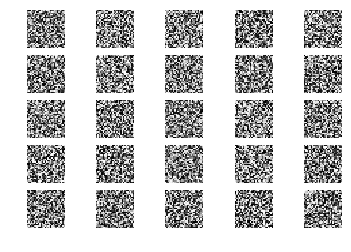

1 [D loss: 0.341498, acc.: 84.77%] [G loss: 1.000189]
2 [D loss: 0.267933, acc.: 97.66%] [G loss: 1.160071]
3 [D loss: 0.225470, acc.: 98.83%] [G loss: 1.290077]
4 [D loss: 0.207987, acc.: 99.22%] [G loss: 1.437009]
5 [D loss: 0.156731, acc.: 100.00%] [G loss: 1.524294]
6 [D loss: 0.147780, acc.: 100.00%] [G loss: 1.656720]
7 [D loss: 0.143863, acc.: 99.61%] [G loss: 1.769511]
8 [D loss: 0.120141, acc.: 100.00%] [G loss: 1.837270]
9 [D loss: 0.110654, acc.: 100.00%] [G loss: 1.988739]
10 [D loss: 0.112207, acc.: 99.61%] [G loss: 1.989778]
11 [D loss: 0.093166, acc.: 99.61%] [G loss: 2.064682]
12 [D loss: 0.096297, acc.: 100.00%] [G loss: 2.120589]
13 [D loss: 0.089281, acc.: 99.61%] [G loss: 2.264965]
14 [D loss: 0.081549, acc.: 100.00%] [G loss: 2.316611]
15 [D loss: 0.080176, acc.: 100.00%] [G loss: 2.350955]
16 [D loss: 0.073622, acc.: 100.00%] [G loss: 2.442382]
17 [D loss: 0.071001, acc.: 100.00%] [G loss: 2.536417]
18 [D loss: 0.063606, acc.: 99.61%] [G loss: 2.626766]
19 [D loss

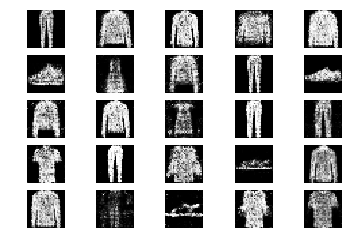

10001 [D loss: 0.659294, acc.: 58.98%] [G loss: 0.843662]
10002 [D loss: 0.641236, acc.: 60.55%] [G loss: 0.836444]
10003 [D loss: 0.664883, acc.: 58.59%] [G loss: 0.850323]
10004 [D loss: 0.681550, acc.: 56.64%] [G loss: 0.834316]
10005 [D loss: 0.653387, acc.: 58.98%] [G loss: 0.828611]
10006 [D loss: 0.693302, acc.: 54.69%] [G loss: 0.792416]
10007 [D loss: 0.690615, acc.: 50.39%] [G loss: 0.831791]
10008 [D loss: 0.672505, acc.: 58.59%] [G loss: 0.819785]
10009 [D loss: 0.678107, acc.: 58.20%] [G loss: 0.850622]
10010 [D loss: 0.669586, acc.: 53.12%] [G loss: 0.822750]
10011 [D loss: 0.676304, acc.: 57.03%] [G loss: 0.836446]
10012 [D loss: 0.691060, acc.: 53.91%] [G loss: 0.828220]
10013 [D loss: 0.694694, acc.: 50.78%] [G loss: 0.843486]
10014 [D loss: 0.670827, acc.: 60.16%] [G loss: 0.827914]
10015 [D loss: 0.694729, acc.: 54.69%] [G loss: 0.833262]
10016 [D loss: 0.672755, acc.: 55.86%] [G loss: 0.830941]
10017 [D loss: 0.695539, acc.: 49.22%] [G loss: 0.823563]
10018 [D loss:

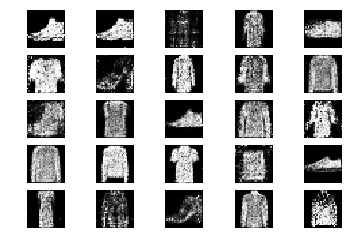

20001 [D loss: 0.647566, acc.: 62.11%] [G loss: 0.881232]
20002 [D loss: 0.654673, acc.: 60.16%] [G loss: 0.854141]
20003 [D loss: 0.658305, acc.: 60.94%] [G loss: 0.871100]
20004 [D loss: 0.688362, acc.: 53.91%] [G loss: 0.870786]
20005 [D loss: 0.631137, acc.: 63.67%] [G loss: 0.886263]
20006 [D loss: 0.652572, acc.: 57.42%] [G loss: 0.899808]
20007 [D loss: 0.652576, acc.: 62.50%] [G loss: 0.859154]
20008 [D loss: 0.640688, acc.: 64.06%] [G loss: 0.872235]
20009 [D loss: 0.651673, acc.: 62.89%] [G loss: 0.828879]
20010 [D loss: 0.678578, acc.: 54.69%] [G loss: 0.889106]
20011 [D loss: 0.634101, acc.: 67.97%] [G loss: 0.881631]
20012 [D loss: 0.673854, acc.: 58.98%] [G loss: 0.878959]
20013 [D loss: 0.652609, acc.: 59.38%] [G loss: 0.899906]
20014 [D loss: 0.650202, acc.: 62.50%] [G loss: 0.890702]
20015 [D loss: 0.685310, acc.: 55.86%] [G loss: 0.895983]
20016 [D loss: 0.625871, acc.: 64.84%] [G loss: 0.868912]
20017 [D loss: 0.671256, acc.: 58.20%] [G loss: 0.908845]
20018 [D loss:

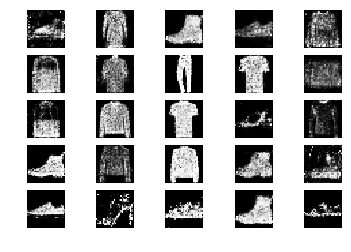

30001 [D loss: 0.665895, acc.: 63.67%] [G loss: 0.874546]
30002 [D loss: 0.624886, acc.: 60.16%] [G loss: 0.903361]
30003 [D loss: 0.643304, acc.: 57.03%] [G loss: 0.951772]
30004 [D loss: 0.645036, acc.: 61.33%] [G loss: 0.893830]
30005 [D loss: 0.646698, acc.: 61.33%] [G loss: 0.895368]
30006 [D loss: 0.644942, acc.: 57.81%] [G loss: 0.843904]
30007 [D loss: 0.639822, acc.: 62.11%] [G loss: 0.937210]
30008 [D loss: 0.651229, acc.: 62.50%] [G loss: 0.886365]
30009 [D loss: 0.658301, acc.: 58.20%] [G loss: 0.881255]
30010 [D loss: 0.641566, acc.: 62.50%] [G loss: 0.902682]
30011 [D loss: 0.667969, acc.: 56.25%] [G loss: 0.897927]
30012 [D loss: 0.682130, acc.: 53.52%] [G loss: 0.902025]
30013 [D loss: 0.635802, acc.: 64.84%] [G loss: 0.950809]
30014 [D loss: 0.681091, acc.: 57.03%] [G loss: 0.890738]
30015 [D loss: 0.635465, acc.: 64.84%] [G loss: 0.930489]
30016 [D loss: 0.652604, acc.: 60.55%] [G loss: 0.931279]
30017 [D loss: 0.656762, acc.: 61.72%] [G loss: 0.874348]
30018 [D loss:

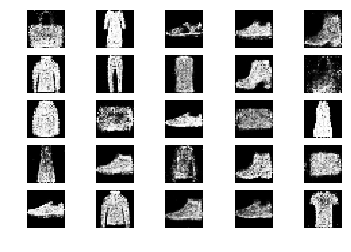

40001 [D loss: 0.641671, acc.: 60.94%] [G loss: 0.966200]
40002 [D loss: 0.642398, acc.: 61.33%] [G loss: 0.898486]
40003 [D loss: 0.637521, acc.: 60.16%] [G loss: 0.961502]
40004 [D loss: 0.608877, acc.: 63.28%] [G loss: 0.964720]
40005 [D loss: 0.607697, acc.: 68.36%] [G loss: 0.963145]
40006 [D loss: 0.643647, acc.: 62.50%] [G loss: 1.031506]
40007 [D loss: 0.628820, acc.: 65.23%] [G loss: 0.976914]
40008 [D loss: 0.642965, acc.: 62.11%] [G loss: 0.981941]
40009 [D loss: 0.679874, acc.: 56.64%] [G loss: 0.994610]
40010 [D loss: 0.662405, acc.: 63.67%] [G loss: 0.977665]
40011 [D loss: 0.634477, acc.: 61.33%] [G loss: 0.977042]
40012 [D loss: 0.638656, acc.: 66.02%] [G loss: 0.902669]
40013 [D loss: 0.622686, acc.: 65.23%] [G loss: 0.989610]
40014 [D loss: 0.669141, acc.: 59.38%] [G loss: 0.882435]
40015 [D loss: 0.634080, acc.: 63.28%] [G loss: 0.946586]
40016 [D loss: 0.641228, acc.: 63.67%] [G loss: 0.909061]
40017 [D loss: 0.652190, acc.: 57.42%] [G loss: 0.968746]
40018 [D loss:

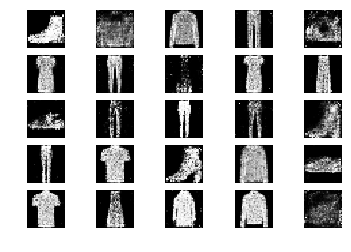

50001 [D loss: 0.653022, acc.: 62.89%] [G loss: 1.053808]
50002 [D loss: 0.630924, acc.: 65.62%] [G loss: 1.019236]
50003 [D loss: 0.611034, acc.: 64.06%] [G loss: 0.984492]
50004 [D loss: 0.654565, acc.: 62.11%] [G loss: 0.985766]
50005 [D loss: 0.624302, acc.: 63.67%] [G loss: 1.013863]
50006 [D loss: 0.589735, acc.: 67.97%] [G loss: 0.973797]
50007 [D loss: 0.640395, acc.: 63.67%] [G loss: 0.975655]
50008 [D loss: 0.630624, acc.: 64.45%] [G loss: 1.026685]
50009 [D loss: 0.615545, acc.: 65.62%] [G loss: 0.958260]
50010 [D loss: 0.672080, acc.: 56.64%] [G loss: 0.956038]
50011 [D loss: 0.595846, acc.: 69.53%] [G loss: 0.996987]
50012 [D loss: 0.681439, acc.: 55.86%] [G loss: 0.973341]
50013 [D loss: 0.656368, acc.: 60.16%] [G loss: 0.974642]
50014 [D loss: 0.649340, acc.: 58.20%] [G loss: 0.974948]
50015 [D loss: 0.637750, acc.: 63.28%] [G loss: 1.028507]
50016 [D loss: 0.599367, acc.: 66.02%] [G loss: 0.966695]
50017 [D loss: 0.612423, acc.: 64.06%] [G loss: 0.947853]
50018 [D loss:

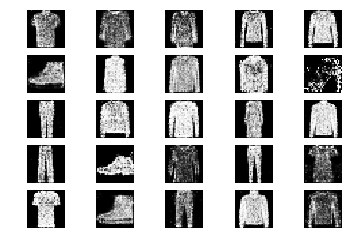

60001 [D loss: 0.620137, acc.: 64.06%] [G loss: 1.007184]
60002 [D loss: 0.576030, acc.: 68.36%] [G loss: 1.002190]
60003 [D loss: 0.577958, acc.: 70.31%] [G loss: 1.045033]
60004 [D loss: 0.591047, acc.: 69.14%] [G loss: 1.001400]
60005 [D loss: 0.616737, acc.: 66.41%] [G loss: 1.036318]
60006 [D loss: 0.601994, acc.: 66.02%] [G loss: 1.073114]
60007 [D loss: 0.615326, acc.: 64.84%] [G loss: 1.049496]
60008 [D loss: 0.621235, acc.: 68.75%] [G loss: 0.981255]
60009 [D loss: 0.623692, acc.: 61.72%] [G loss: 0.984914]
60010 [D loss: 0.621030, acc.: 65.62%] [G loss: 1.002404]
60011 [D loss: 0.661583, acc.: 57.81%] [G loss: 1.043174]
60012 [D loss: 0.622148, acc.: 60.94%] [G loss: 1.026778]
60013 [D loss: 0.612823, acc.: 67.19%] [G loss: 1.029290]
60014 [D loss: 0.596372, acc.: 67.19%] [G loss: 1.076362]
60015 [D loss: 0.608560, acc.: 66.41%] [G loss: 1.094434]
60016 [D loss: 0.627947, acc.: 64.06%] [G loss: 1.041562]
60017 [D loss: 0.585173, acc.: 66.41%] [G loss: 1.024623]
60018 [D loss:

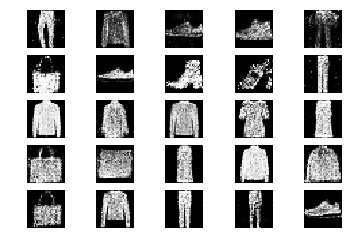

70001 [D loss: 0.583812, acc.: 68.36%] [G loss: 1.142756]
70002 [D loss: 0.533310, acc.: 72.66%] [G loss: 1.128212]
70003 [D loss: 0.556170, acc.: 72.27%] [G loss: 1.130649]
70004 [D loss: 0.598754, acc.: 68.36%] [G loss: 1.029712]
70005 [D loss: 0.628581, acc.: 63.28%] [G loss: 1.030321]
70006 [D loss: 0.598721, acc.: 69.53%] [G loss: 1.081521]
70007 [D loss: 0.594388, acc.: 68.75%] [G loss: 1.157696]
70008 [D loss: 0.570059, acc.: 69.53%] [G loss: 1.026366]
70009 [D loss: 0.660613, acc.: 63.28%] [G loss: 1.070444]
70010 [D loss: 0.587299, acc.: 71.09%] [G loss: 1.142129]
70011 [D loss: 0.607163, acc.: 66.80%] [G loss: 1.103246]
70012 [D loss: 0.638702, acc.: 58.98%] [G loss: 1.156643]
70013 [D loss: 0.636331, acc.: 66.02%] [G loss: 1.064321]
70014 [D loss: 0.638656, acc.: 66.41%] [G loss: 1.118712]
70015 [D loss: 0.588872, acc.: 69.92%] [G loss: 1.149669]
70016 [D loss: 0.630151, acc.: 63.67%] [G loss: 1.137955]
70017 [D loss: 0.617835, acc.: 61.33%] [G loss: 1.129548]
70018 [D loss:

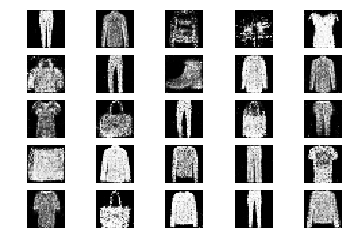

80001 [D loss: 0.581473, acc.: 70.31%] [G loss: 1.172704]
80002 [D loss: 0.559518, acc.: 75.00%] [G loss: 1.095751]
80003 [D loss: 0.638659, acc.: 60.94%] [G loss: 1.043144]
80004 [D loss: 0.586273, acc.: 67.19%] [G loss: 1.136844]
80005 [D loss: 0.584845, acc.: 70.70%] [G loss: 1.100719]
80006 [D loss: 0.583988, acc.: 64.45%] [G loss: 1.107339]
80007 [D loss: 0.587518, acc.: 69.53%] [G loss: 1.141575]
80008 [D loss: 0.588818, acc.: 67.97%] [G loss: 1.195219]
80009 [D loss: 0.594263, acc.: 64.06%] [G loss: 1.174588]
80010 [D loss: 0.580842, acc.: 68.75%] [G loss: 1.143517]
80011 [D loss: 0.604440, acc.: 64.06%] [G loss: 1.100284]
80012 [D loss: 0.574122, acc.: 68.75%] [G loss: 1.174783]
80013 [D loss: 0.612212, acc.: 70.70%] [G loss: 1.211228]
80014 [D loss: 0.641233, acc.: 62.50%] [G loss: 1.170338]
80015 [D loss: 0.597859, acc.: 62.11%] [G loss: 1.244713]
80016 [D loss: 0.545920, acc.: 71.09%] [G loss: 1.160492]
80017 [D loss: 0.599534, acc.: 66.41%] [G loss: 1.199364]
80018 [D loss:

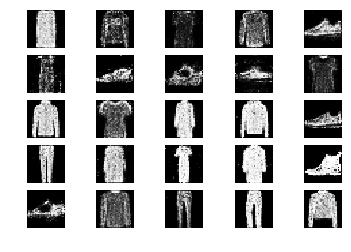

90001 [D loss: 0.597426, acc.: 63.67%] [G loss: 1.254739]
90002 [D loss: 0.583855, acc.: 67.97%] [G loss: 1.109075]
90003 [D loss: 0.577431, acc.: 68.75%] [G loss: 1.192546]
90004 [D loss: 0.541112, acc.: 74.22%] [G loss: 1.108155]
90005 [D loss: 0.599154, acc.: 66.80%] [G loss: 1.192056]
90006 [D loss: 0.547960, acc.: 67.58%] [G loss: 1.178763]
90007 [D loss: 0.563367, acc.: 70.70%] [G loss: 1.122957]
90008 [D loss: 0.574573, acc.: 67.97%] [G loss: 1.212163]
90009 [D loss: 0.548017, acc.: 70.70%] [G loss: 1.113309]
90010 [D loss: 0.599356, acc.: 68.36%] [G loss: 1.150158]
90011 [D loss: 0.569927, acc.: 72.66%] [G loss: 1.183009]
90012 [D loss: 0.605671, acc.: 67.97%] [G loss: 1.186624]
90013 [D loss: 0.548269, acc.: 73.44%] [G loss: 1.189465]
90014 [D loss: 0.598354, acc.: 66.80%] [G loss: 1.157246]
90015 [D loss: 0.564343, acc.: 67.97%] [G loss: 1.186861]
90016 [D loss: 0.579019, acc.: 71.48%] [G loss: 1.263018]
90017 [D loss: 0.563435, acc.: 70.31%] [G loss: 1.281322]
90018 [D loss:

In [8]:
epochs=100000
batch_size = 128
sample_interval = 10000


# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))



for epoch in range(epochs):
  # ---------------------
  #  Train Discriminator
  # ---------------------

  # Select a random batch of images
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  imgs = X_train[idx]

  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  # Generate a batch of new images
  gen_imgs = generator.predict(noise)

  # Train the discriminator
  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

  # ---------------------
  #  Train Generator
  # ---------------------

  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  # Train the generator (to have the discriminator label samples as valid)
  g_loss = combined.train_on_batch(noise, valid)

  # Plot the progress
  print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  # If at save interval => save generated image samples
  if epoch % sample_interval == 0:
      sample_images(generator, epoch)

Now let us see how well our forger is doing, when it comes to generate fake outfits.

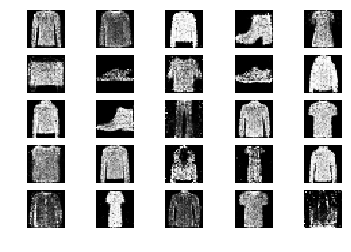

In [9]:
sample_images(generator, epochs)

#Now let us try and generate some new clothes

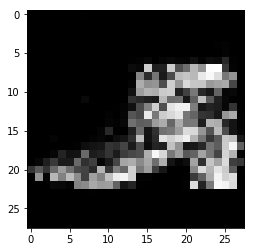

In [10]:
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)
# Rescale images 0 - 1
gen_img = 0.5 * gen_img + 0.5
plt.figure()
plt.imshow(gen_img[0, :,:,0], cmap='gray')
plt.show()

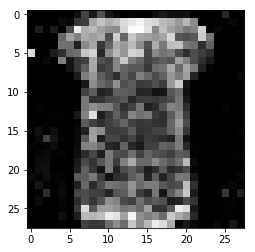

In [11]:
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)
# Rescale images 0 - 1
gen_img = 0.5 * gen_img + 0.5
plt.figure()
plt.imshow(gen_img[0, :,:,0], cmap='gray')
plt.show()

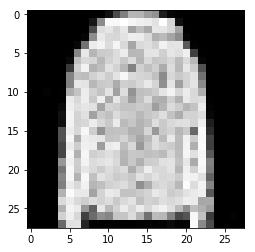

In [12]:
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)
# Rescale images 0 - 1
gen_img = 0.5 * gen_img + 0.5
plt.figure()
plt.imshow(gen_img[0, :,:,0], cmap='gray')
plt.show()

As one can see the model is doing that well at 100000 epochs, but any improvements might come from using bigger imagesize, but that impacts the trainingtime drastically.